In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data

In [125]:
X = 2 * np.random.rand(100, 1)

In [126]:
y = 4 + 3 * X + np.random.rand(100,1)

In [127]:
X.shape

(100, 1)

In [128]:
y.shape

(100, 1)

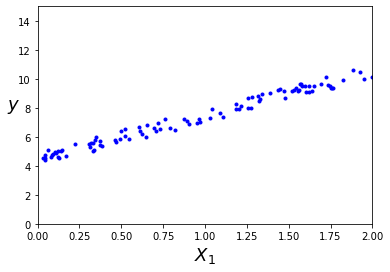

In [129]:
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.xlabel('$X_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0);
plt.savefig('X_vs_y.jpg')

# Total Variation from the Mean

In [130]:
# Computing the mean of y
y_mean = np.mean(y)
y_mean

7.301240187418261

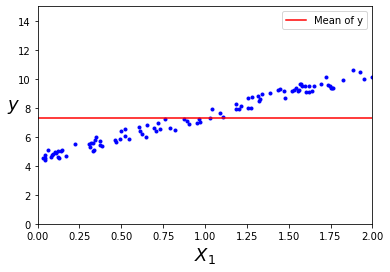

In [131]:
plt.plot(X, y, 'b.')
plt.axhline(y_mean, color='red', label='Mean of y')
plt.legend()
plt.axis([0,2,0,15])
plt.xlabel('$X_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0);
plt.savefig('mean_of_y.jpg')

In [133]:
# Compute the sum of the squared difference between y and the mean of y (squared error, total variation)
se_y = np.sum(np.square(y - y_mean))
se_y

334.1507316690642

# Least Squares Regression

In [134]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [135]:
lin_reg.fit(X, y)

LinearRegression()

In [136]:
# Computing the sum of the squared residuals (squared_error)
def sum_squared_residuals(y_true, y_pred):
    return np.sum(np.square(y_true - y_pred))

In [137]:
# Squared error of linear regression line
se_lin_reg = sum_squared_residuals(y, lin_reg.predict(X))

In [138]:
# Computing the mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, lin_reg.predict(X))

In [141]:
mse * X.shape[0]

7.856752962811502

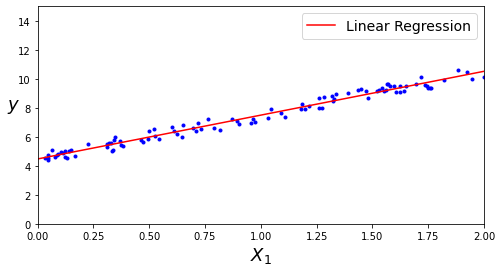

In [142]:
plt.figure(figsize=(8,4))
X_new = np.array([[0], [2]])
y_pred = lin_reg.predict(X_new)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred, 'r-', label = 'Linear Regression')
plt.legend(fontsize=14)
plt.axis([0,2,0,15])
plt.xlabel('$X_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.savefig('linear_regression.jpg');

# R-Squared (Coefficient of Determination)

- We can define R-Squared as the proportion of the prediction error that is eliminated by using least square regression as opposed to always predicting the mean.

In [144]:
# Compute error reduction
error_reduction = se_y - se_lin_reg
error_reduction

326.2939787062527

In [145]:
# Compute proportion of error reduction (R squared)
r_squared = error_reduction / se_y
r_squared

0.9764873985953361

In [88]:
# Using Scikit-learn
from sklearn.metrics import r2_score

In [89]:
r2_score(y, lin_reg.predict(X))

0.9698681101316847

# Correlation Coefficient (r)

In [148]:
r = np.sqrt(r_squared)

In [149]:
r

0.9881737694329555